# Eksplorasi Data (EDA)

### Import Library yang Diperlukan

In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

### Load Data

In [167]:
# Load data kebakaran
df_ntt_ntb = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='SiPongi NTT-NTB')

# Load data cuaca dari berbagai kabupaten/kota
df_kab_lombok_barat = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTB Kab. Lombok Barat')
df_kab_sumbawa = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTB Kab. Sumbawa')
df_kota_mataram = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTB Kota Mataram')
df_kota_bima = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTB Kota Bima')
df_kab_kupang = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Kupang')
df_kab_alor = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Alor')
df_kab_flores_timur = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Flores Timur')
df_kab_sikka = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Sikka')
df_kab_manggarai = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Manggarai')
df_kab_sumba_timur = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Sumba Timur')
df_kab_rote_ndao = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Rote Ndao')
df_kab_manggarai_barat = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kab. Manggarai Barat')
df_kota_kupang = pd.read_excel('data_ntt_ntb.xlsx', sheet_name='NTT Kota Kupang')

### Gabungkan Data BMKG

In [168]:
df_bmkg_all = pd.concat([
    df_kab_lombok_barat,
    df_kab_sumbawa,
    df_kota_mataram,
    df_kota_bima,
    df_kab_kupang,
    df_kab_alor,
    df_kab_flores_timur,
    df_kab_sikka,
    df_kab_manggarai,
    df_kab_sumba_timur,
    df_kab_rote_ndao,
    df_kab_manggarai_barat,
    df_kota_kupang
], ignore_index=True)

print("\nData BMKG Gabungan:")
print(df_bmkg_all.head())
print(f"\nTotal Data BMKG: {len(df_bmkg_all)}")


Data BMKG Gabungan:
       Kab Kota    Tanggal    TN    TX  TAVG RH_AVG    RR   SS FF_X  DDD_X  \
0  LOMBOK BARAT 2024-05-21    22  33.2  29.3     74     0  8.3    5    150   
1  LOMBOK BARAT 2024-05-22  22.4  33.8  29.5     75     0  8.7    4    280   
2  LOMBOK BARAT 2024-05-23    24  32.5    29     80  8888  8.2    4    180   
3  LOMBOK BARAT 2024-05-24  23.6  32.8  29.2     80   8.7  6.9    5    180   
4  LOMBOK BARAT 2024-05-25  24.8  32.2  29.4     77     0  7.1    4    150   

   FF_AVG DDD_CAR  
0       2      S   
1       1      S   
2       2      S   
3       2      S   
4       3      SE  

Total Data BMKG: 4758


### Tampilkan informasi umum dataframe

In [169]:
print("\n--- Info Data BMKG Gabungan ---")
df_bmkg_all.info()


--- Info Data BMKG Gabungan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Kab Kota  4758 non-null   object        
 1   Tanggal   4758 non-null   datetime64[ns]
 2   TN        4758 non-null   object        
 3   TX        4758 non-null   object        
 4   TAVG      4758 non-null   object        
 5   RH_AVG    4758 non-null   object        
 6   RR        4758 non-null   object        
 7   SS        4758 non-null   object        
 8   FF_X      4758 non-null   object        
 9   DDD_X     4758 non-null   int64         
 10  FF_AVG    4758 non-null   int64         
 11  DDD_CAR   4758 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 446.2+ KB


### Tampilkan statistik deskriptif

In [170]:
print("\n--- Statistik Deskriptif Data BMKG ---")
print(df_bmkg_all.describe())


--- Statistik Deskriptif Data BMKG ---
                   Tanggal        DDD_X       FF_AVG
count                 4758  4758.000000  4758.000000
mean   2024-11-19 12:00:00   189.907734     2.251366
min    2024-05-21 00:00:00     0.000000     0.000000
25%    2024-08-20 00:00:00   100.000000     2.000000
50%    2024-11-19 12:00:00   190.000000     2.000000
75%    2025-02-19 00:00:00   290.000000     3.000000
max    2025-05-21 00:00:00   360.000000     8.000000
std                    NaN   103.954685     0.992866


# Prepemrosesan Data

### Data Kebakaran (SiPongi)

Konversi format Tanggal dan agregasi data harian

In [171]:
df_ntt_ntb['Tanggal'] = pd.to_datetime(df_ntt_ntb['Tanggal']).dt.date

Agregasi data kebakaran per hari per kabupaten

In [172]:
df_ntt_ntb_harian = df_ntt_ntb.groupby(['Tanggal', 'Desa', 'Kab Kota']).agg({
    'Confidence': 'max',  # Ambil nilai confidence tertinggi per hari
    'Latitude': 'first',  # Ambil nilai pertama untuk lokasi
    'Longitude': 'first'
}).reset_index()

print("\nData Kebakaran Harian:")
print(df_ntt_ntb_harian.head())


Data Kebakaran Harian:
      Tanggal         Desa Kab Kota Confidence  Latitude  Longitude
0  2024-05-21      Nuataus   KUPANG     Medium  -9.81697  123.78232
1  2024-05-21       Tawali     BIMA     Medium  -8.34952  118.97616
2  2024-05-21      Wailiti    SIKKA     Medium  -8.58982  122.17707
3  2024-05-22  Karang Dima  SUMBAWA     Medium  -8.50297  117.37979
4  2024-05-22      Maukuru     ALOR     Medium  -8.16964  124.88189


### Data Cuaca (BMKG)

Konversi format Tanggal di data BMKG

In [173]:
df_bmkg_all['Tanggal'] = pd.to_datetime(df_bmkg_all['Tanggal']).dt.date

### Gabungkan Data Kebakaran dan Cuaca

In [174]:
df_merged = pd.merge(
    df_ntt_ntb_harian,
    df_bmkg_all,
    on=['Tanggal', 'Kab Kota'],
    how='left'  # Keep semua data kebakaran meskipun data cuaca tidak ada
)

print("\nData Gabungan Final:")
print(df_merged.head())
print(f"\nTotal Data Gabungan: {len(df_merged)}")



Data Gabungan Final:
      Tanggal         Desa Kab Kota Confidence  Latitude  Longitude    TN  \
0  2024-05-21      Nuataus   KUPANG     Medium  -9.81697  123.78232  26.6   
1  2024-05-21       Tawali     BIMA     Medium  -8.34952  118.97616  24.8   
2  2024-05-21      Wailiti    SIKKA     Medium  -8.58982  122.17707  25.5   
3  2024-05-22  Karang Dima  SUMBAWA     Medium  -8.50297  117.37979  22.8   
4  2024-05-22      Maukuru     ALOR     Medium  -8.16964  124.88189  23.2   

     TX  TAVG RH_AVG RR    SS FF_X  DDD_X  FF_AVG DDD_CAR  
0  31.4  28.1     72  0  11.2    6     90       4      E   
1    33  27.8     79  -   2.2    7    120       3      C   
2  31.4  27.7     77  0   9.9    5    220       3      SW  
3  34.4  28.4     75  0  10.4    4    130       2      SE  
4  32.2  28.1     77  0   6.2    3     30       1      C   

Total Data Gabungan: 6045


In [175]:
# SEKARANG, KITA CEK ISI ASLI KOLOM CONFIDENCE
print("\n--- Mengecek Isi Unik Kolom 'Confidence' SEBELUM diproses ---")
# Ini akan menampilkan semua kemungkinan nilai yang ada di kolom itu
print(df_merged['Confidence'].unique())


--- Mengecek Isi Unik Kolom 'Confidence' SEBELUM diproses ---
['Medium' 'High']


### Ganti nilai aneh 8888 dengan NaN

In [176]:
df_merged.replace(8888, np.nan, inplace=True)
df_merged.replace('-', np.nan, inplace=True)
print("Nilai 8888 dan '-' berhasil diubah menjadi NaN (data kosong).")
df_merged.info()

Nilai 8888 dan '-' berhasil diubah menjadi NaN (data kosong).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     6045 non-null   object 
 1   Desa        6045 non-null   object 
 2   Kab Kota    6045 non-null   object 
 3   Confidence  6045 non-null   object 
 4   Latitude    6045 non-null   float64
 5   Longitude   6045 non-null   float64
 6   TN          6020 non-null   float64
 7   TX          6044 non-null   float64
 8   TAVG        5966 non-null   float64
 9   RH_AVG      5966 non-null   float64
 10  RR          5770 non-null   float64
 11  SS          6019 non-null   float64
 12  FF_X        6045 non-null   int64  
 13  DDD_X       6045 non-null   int64  
 14  FF_AVG      6045 non-null   int64  
 15  DDD_CAR     6045 non-null   object 
dtypes: float64(8), int64(3), object(5)
memory usage: 755.8+ KB


C:\Users\Pongo\AppData\Local\Temp\ipykernel_23632\1512841044.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace(8888, np.nan, inplace=True)
C:\Users\Pongo\AppData\Local\Temp\ipykernel_23632\1512841044.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace('-', np.nan, inplace=True)


### Cleaning Data

Daftar kolom numerik yang akan diproses

In [177]:
numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_AVG']

Konversi kolom numerik dan handle missing values

In [178]:
for col in numeric_cols:
    # Konversi ke float, jika error menjadi NaN
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

Konversi Confidence dari teks ke numerik

In [179]:
confidence_map = {'Low': 30, 'Medium': 60, 'High': 90}
df_merged['Confidence'] = df_merged['Confidence'].map(confidence_map).astype(float)

Hapus baris dengan Kab Kota kosong

In [180]:
df_merged.dropna(subset=['Kab Kota'], inplace=True)

Isi missing value dengan rata-rata

In [181]:
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(df_merged[numeric_cols].mean())

Isi nilai kosong di 'Confidence' dengan 0 (asumsi tidak ada hotspot = confidence 0)

In [182]:
df_merged['Confidence'].fillna(0, inplace=True)

C:\Users\Pongo\AppData\Local\Temp\ipykernel_23632\675091160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Confidence'].fillna(0, inplace=True)


### Validasi Hasil Cleaning

In [183]:
print("\nMissing Values setelah cleaning:")
print(df_merged[numeric_cols].isnull().sum())

print("\nDistribusi Confidence setelah konversi:")
print(df_merged['Confidence'].value_counts())
df_merged.info()


Missing Values setelah cleaning:
TN        0
TX        0
TAVG      0
RH_AVG    0
RR        0
SS        0
FF_AVG    0
dtype: int64

Distribusi Confidence setelah konversi:
Confidence
60.0    5738
90.0     307
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     6045 non-null   object 
 1   Desa        6045 non-null   object 
 2   Kab Kota    6045 non-null   object 
 3   Confidence  6045 non-null   float64
 4   Latitude    6045 non-null   float64
 5   Longitude   6045 non-null   float64
 6   TN          6045 non-null   float64
 7   TX          6045 non-null   float64
 8   TAVG        6045 non-null   float64
 9   RH_AVG      6045 non-null   float64
 10  RR          6045 non-null   float64
 11  SS          6045 non-null   float64
 12  FF_X        6045 non-null   int64  
 13  DDD_X       6045 non-null   int64  
 1

# Prapemrosesan Data + Data Balancing

### Data Balancing (SMOTE)

In [ ]:
print("\nTahap 3: Melakukan Data Balancing...")

Kita hanya butuh baris yang ada confidencenya (bukan yang 0) untuk di-balance

In [ ]:
df_balancing = df_merged[df_merged['Confidence'] > 0].copy()

le = LabelEncoder()
df_balancing['Confidence_Label'] = le.fit_transform(df_balancing['Confidence'])

fitur_model = ['TN', 'TX', 'RH_AVG', 'RR', 'SS', 'FF_AVG']
X = df_balancing[fitur_model]
y = df_balancing['Confidence_Label']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

Buat DataFrame BARU dari hasil SMOTE

In [ ]:
df_final_smote = pd.DataFrame(X_res, columns=fitur_model)
df_final_smote['Confidence_Label'] = y_res
df_final_smote['Confidence'] = le.inverse_transform(y_res)
print("\nDistribusi setelah SMOTE:")
print(df_final_smote['Confidence'].value_counts())
print("Selesai.")


Tahap 3: Melakukan Data Balancing...

Distribusi setelah SMOTE:
Confidence
60.0    5738
90.0    5738
Name: count, dtype: int64
Selesai.


# Pemodelan

## Random Forest

#### Import Library yang Diperlukan

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#### Analisis Korelasi

Ambil kode konversi dari script sebelumnya

In [151]:
# confidence_map = {'Low': 30, 'Medium': 60, 'High': 90}
# df_merged['Confidence'] = df_merged['Confidence'].map(confidence_map).astype(float)

Hapus baris yang mungkin jadi NaN setelah mapping (jika ada nilai selain Low, Medium, High)

In [152]:
# df_merged.dropna(subset=['Confidence'], inplace=True)

Membuat heatmap korelasi antara Confidence dan variabel cuaca

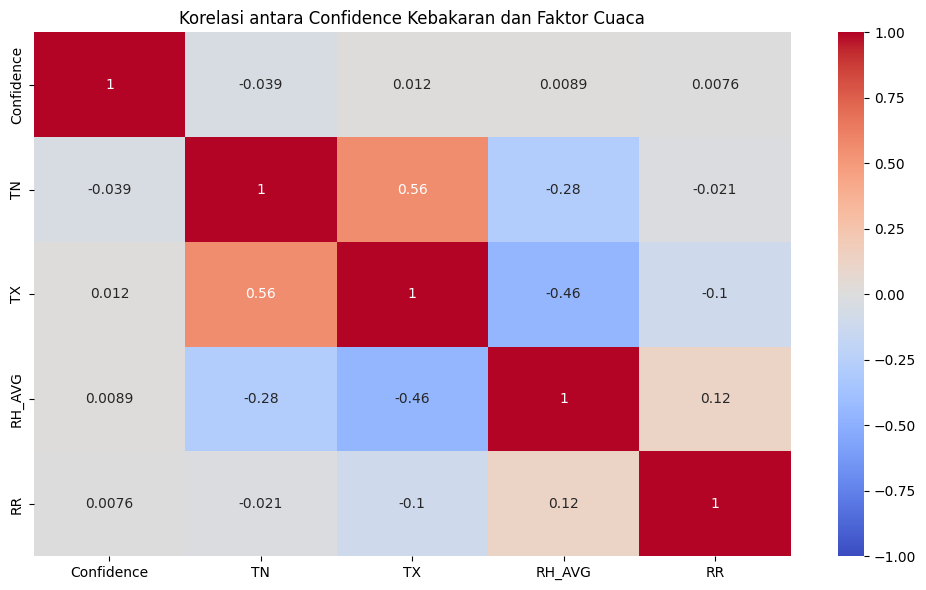

In [153]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_merged[['Confidence', 'TN', 'TX', 'RH_AVG', 'RR']].corr(),
    annot=True,  # Menampilkan nilai korelasi
    cmap='coolwarm',  # Warna biru-merah
    vmin=-1, vmax=1  # Skala korelasi dari -1 sampai 1
)
plt.title('Korelasi antara Confidence Kebakaran dan Faktor Cuaca')
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()

#### Preparasi Data untuk Klasifikasi

Membuat target binary (1 jika Confidence > threshold, 0 jika tidak)


In [154]:
threshold = 70
df_merged['is_fire'] = (df_merged['Confidence'] > threshold).astype(int)

Memisahkan fitur dan target

In [155]:
X = df_merged[['TN', 'TX', 'RH_AVG', 'RR']]  # Variabel cuaca sebagai fitur
y = df_merged['is_fire']                      # Target binary

Membagi data menjadi training dan testing set

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% data untuk testing
    random_state=42  # Seed untuk reproducibility
)

#### Standardisasi Data

Membuat scaler untuk normalisasi data

In [157]:
scaler = StandardScaler()

Normalisasi data training dan testing

In [158]:
X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform data training
X_test_scaled = scaler.transform(X_test)       # Hanya transform data testing

#### Pembuatan dan Pelatihan Model

Membuat model Random Forest Classifier

In [159]:
model = RandomForestClassifier(
    random_state=42,  # Seed untuk reproducibility
    n_estimators=100,  # Jumlah tree di forest
    max_depth=5,       # Kedalaman maksimum tiap tree
    class_weight='balanced'  # Menangani imbalance class
)

Melatih model dengan data training

In [160]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

#### Evaluasi Model

Memprediksi data testing

In [161]:
y_pred = model.predict(X_test_scaled)

Menampilkan metrik evaluasi

In [162]:
print("\nEvaluasi Model:")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluasi Model:
Akurasi: 0.7758478081058726

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1145
           1       0.11      0.47      0.18        64

    accuracy                           0.78      1209
   macro avg       0.54      0.63      0.53      1209
weighted avg       0.92      0.78      0.83      1209



### Analisis Feature Importance

Mendapatkan importance dari masing-masing fitur

In [163]:
importances = model.feature_importances_
features = X.columns

Membuat plot feature importance

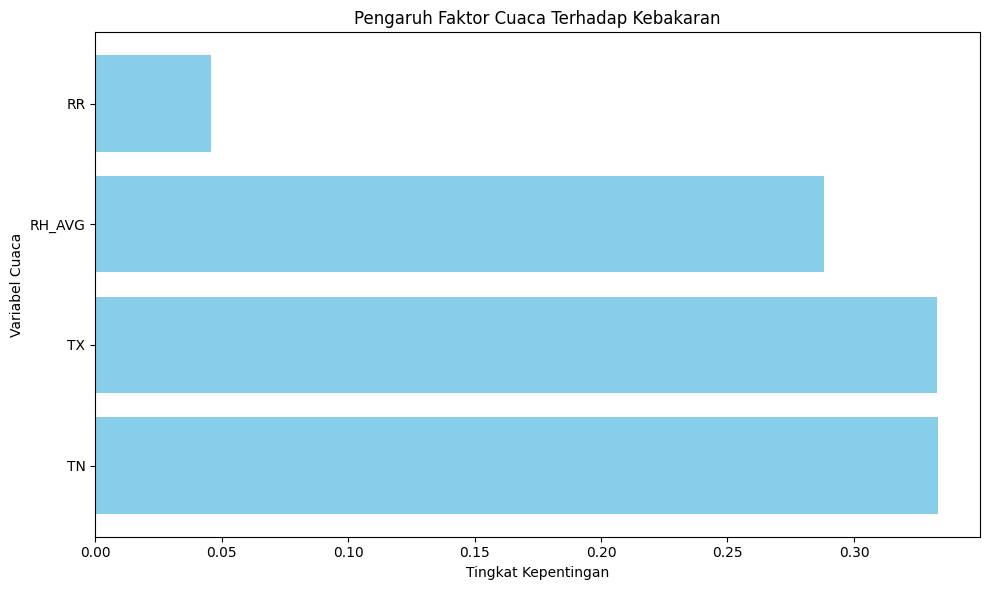

In [164]:
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Pengaruh Faktor Cuaca Terhadap Kebakaran')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Variabel Cuaca')
plt.tight_layout()
plt.show()

### Visualisasi Hasil Prediksi (Regresi)

Untuk regresi (jika menggunakan Confidence sebagai nilai kontinu)

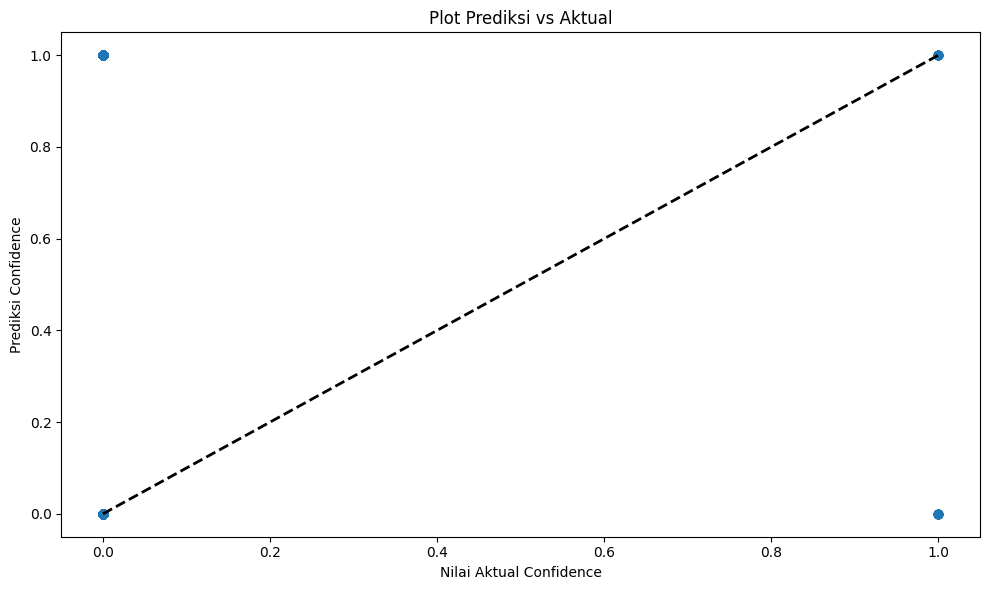

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Garis diagonal
plt.xlabel("Nilai Aktual Confidence")
plt.ylabel("Prediksi Confidence")
plt.title("Plot Prediksi vs Aktual")
plt.tight_layout()
plt.show()

## XGBoost

### Import Library yang Diperlukan

In [185]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, f1_score, RocCurveDisplay

### Persiapan Data

Split data ke training dan testing set

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Lakukan scaling pada fitur

In [187]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data berhasil disiapkan dan di-split.")
print("Ukuran X_train:", X_train_scaled.shape)
print("Ukuran X_test:", X_test_scaled.shape)

Data berhasil disiapkan dan di-split.
Ukuran X_train: (4231, 6)
Ukuran X_test: (1814, 6)


### Hyperparameter Tuning dengan RandomizedSearchCSV

In [188]:
print("\nMemulai proses hyperparameter tuning...")


Memulai proses hyperparameter tuning...


Hitung rasio kelas untuk menangani imbalance (dihitung dari data training)

In [189]:
try:
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
except ZeroDivisionError:
    scale_pos_weight = 1

print(f"Nilai scale_pos_weight untuk imbalance: {scale_pos_weight:.2f}")

Nilai scale_pos_weight untuk imbalance: 18.68


Definisikan parameter grid yang mau di-tuning, Kita coba variasikan beberapa parameter penting

In [190]:
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [scale_pos_weight] # Pakai nilai yang sudah dihitung
}

Buat model dasar XGBoost sebagai estimator

In [191]:
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    use_label_encoder=False, # Deprecated, lebih baik set ke False
    random_state=42
)

Inisialisasi RandomizedSearchCV, Scoring 'f1' bagus untuk imbalanced data

In [192]:
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=50,          # Jumlah kombinasi parameter yang dicoba (bisa ditambah/dikurangi)
    scoring='f1',       # Fokus optimasi pada F1-score
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,          # Gunakan semua core CPU
    random_state=42
)

Jalankan proses pencarian hyperparameter

In [193]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Pongo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constr...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 150, 200, 250],
                                        'scale_pos_weight': [18.67906976744186],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

Tampilkan hasil tuning

In [194]:
print("\nProses tuning selesai!")
print("==================================================")
print("Parameter terbaik ditemukan:")
print(random_search.best_params_)
print(f"Skor F1 terbaik dari Cross-Validation: {random_search.best_score_:.4f}")
print("==================================================")


Proses tuning selesai!
Parameter terbaik ditemukan:
{'subsample': 0.7, 'scale_pos_weight': 18.67906976744186, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9}
Skor F1 terbaik dari Cross-Validation: 0.1941


### Evaluasi Model Final dengan Parameter Terbaik

In [195]:
print("\nMelakukan evaluasi dengan model terbaik pada data test...")


Melakukan evaluasi dengan model terbaik pada data test...


Ambil model terbaik dari hasil search, .best_estimator_ adalah model yang sudah di-refit dengan parameter terbaik pada seluruh data training

In [196]:
best_model = random_search.best_estimator_

Lakukan prediksi pada data test

In [197]:
y_pred_tuned = best_model.predict(X_test_scaled)
y_prob_tuned = best_model.predict_proba(X_test_scaled)[:, 1] # Probabilitas kelas positif

Tampilkan metrik evaluasi

In [198]:
print("\n=== Evaluasi XGBoost (Tuned) ===")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


=== Evaluasi XGBoost (Tuned) ===
ROC-AUC Score: 0.6350
F1-Score: 0.1882

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1722
           1       0.12      0.43      0.19        92

    accuracy                           0.81      1814
   macro avg       0.54      0.63      0.54      1814
weighted avg       0.92      0.81      0.86      1814



### Visualisasi dan Analisis Hasil

In [199]:
print("\nMembuat visualisasi hasil...")


Membuat visualisasi hasil...


1. Feature Importance, plot_importance butuh model yang sudah di-fit, kita pakai best_model

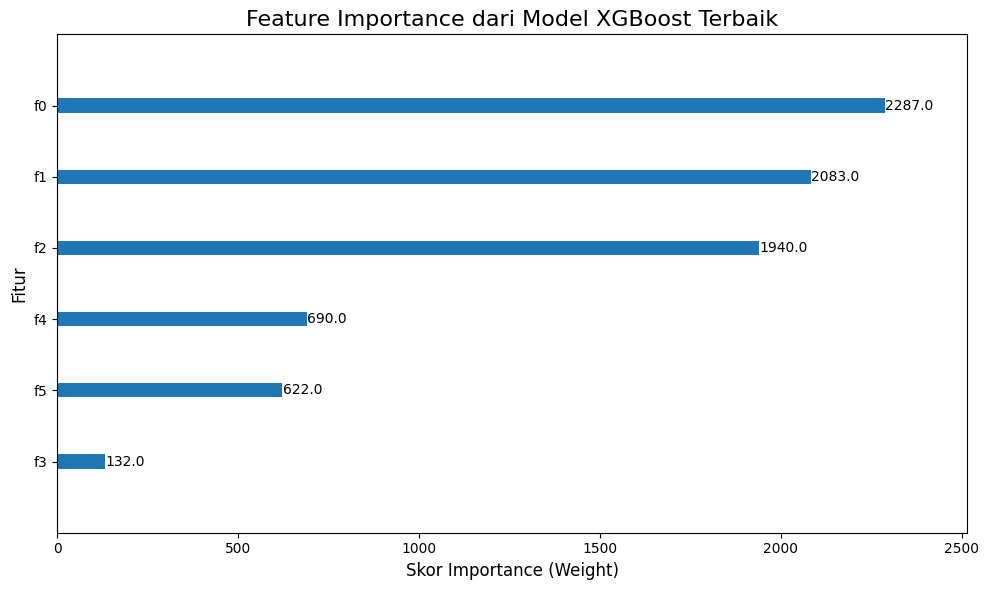

In [200]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='weight', ax=plt.gca())
plt.title('Feature Importance dari Model XGBoost Terbaik', fontsize=16)
plt.xlabel('Skor Importance (Weight)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

2. ROC Curve, Lebih mudah pakai RocCurveDisplay

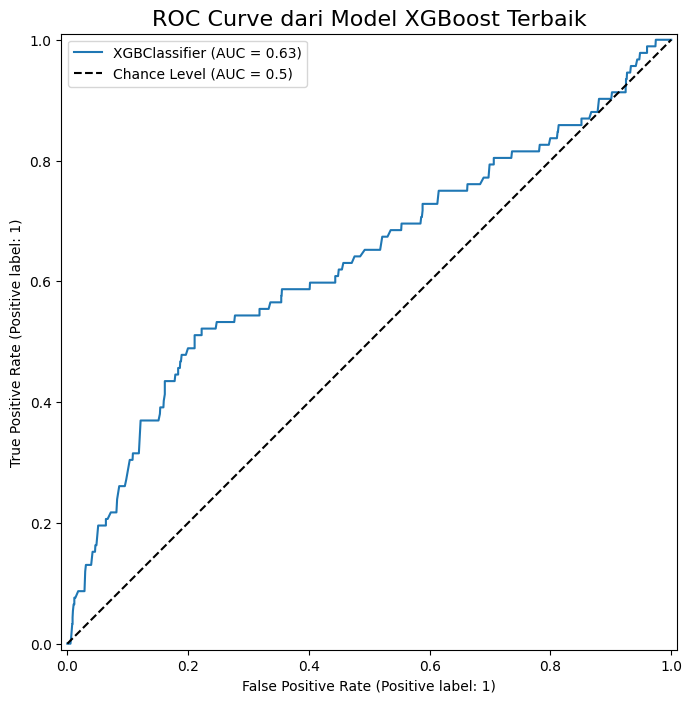

In [201]:
fig, ax = plt.subplots(figsize=(8, 8))
RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.5)')
ax.set_title('ROC Curve dari Model XGBoost Terbaik', fontsize=16)
ax.legend()
plt.show()

3. Plot Prediksi Probabilitas vs Aktual, Ini membantu melihat sebaran prediksi model

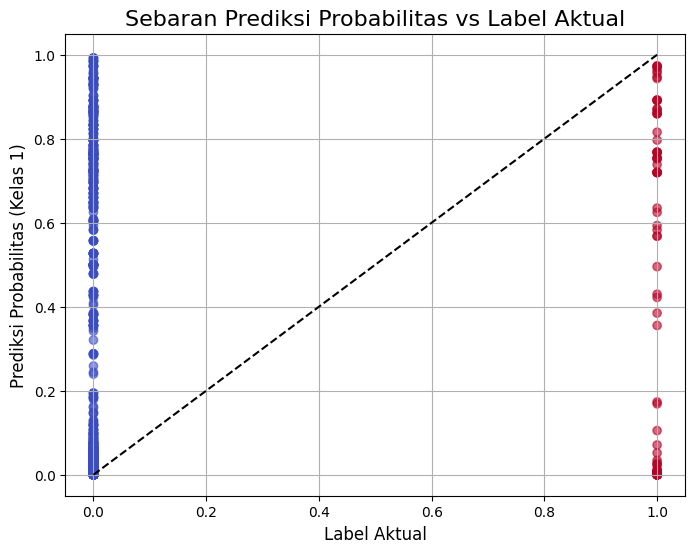


Analisis selesai!


In [202]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_prob_tuned, alpha=0.6, c=y_test, cmap='coolwarm')
plt.plot([0, 1], [0, 1], 'k--') # Garis referensi y=x
plt.xlabel('Label Aktual', fontsize=12)
plt.ylabel('Prediksi Probabilitas (Kelas 1)', fontsize=12)
plt.title('Sebaran Prediksi Probabilitas vs Label Aktual', fontsize=16)
plt.grid(True)
plt.show()

print("\nAnalisis selesai!")

## LightGBM

### Import library yang diperlukan

In [217]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Hyperparameter Tuning dengan RandomizedSearchCSV

In [218]:
print("\nMemulai proses hyperparameter tuning untuk LightGBM...")


Memulai proses hyperparameter tuning untuk LightGBM...


Hitung scale_pos_weight untuk handle imbalance

In [219]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

Definisikan parameter grid untuk LightGBM, num_leaves adalah parameter penting di LGBM

In [220]:
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 50], # Defaultnya 31
    'max_depth': [-1, 5, 10], # -1 berarti tidak ada batas
    'reg_alpha': [0.1, 0.5], # L1 regularization
    'reg_lambda': [0.1, 0.5], # L2 regularization
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'scale_pos_weight': [scale_pos_weight] # Pakai nilai yang sudah dihitung
}

Buat model dasar LightGBM

In [221]:
lgbm_base = lgb.LGBMClassifier(objective='binary', random_state=42)

Inisialisasi RandomizedSearchCV

In [222]:
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_base,
    param_distributions=param_dist,
    n_iter=50,          # Jumlah kombinasi acak yang dicoba
    scoring='f1',       # Fokus optimasi pada F1-score
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

Jalankan proses pencarian

In [209]:
random_search_lgbm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 215, number of negative: 4016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 4231, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050815 -> initscore=-2.927404
[LightGBM] [Info] Start training from score -2.927404


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(objective='binary',
                                            random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'num_leaves': [20, 31, 40, 50],
                                        'reg_alpha': [0.1, 0.5],
                                        'reg_lambda': [0.1, 0.5],
                                        'scale_pos_weight': [18.67906976744186],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='f1', verbose=1)

Tampilkan hasil tuning

In [210]:
print("\nProses tuning LightGBM selesai!")
print("==================================================")
print("Parameter terbaik ditemukan:")
print(random_search_lgbm.best_params_)
print(f"Skor F1 terbaik dari Cross-Validation: {random_search_lgbm.best_score_:.4f}")
print("==================================================")


Proses tuning LightGBM selesai!
Parameter terbaik ditemukan:
{'subsample': 0.8, 'scale_pos_weight': 18.67906976744186, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'num_leaves': 40, 'n_estimators': 250, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Skor F1 terbaik dari Cross-Validation: 0.1898


### Evaluasi Model Final LightGBM

In [211]:
print("\nMelakukan evaluasi dengan model LightGBM terbaik pada data test...")


Melakukan evaluasi dengan model LightGBM terbaik pada data test...


Ambil model terbaik

In [212]:
best_lgbm = random_search_lgbm.best_estimator_

Lakukan prediksi pada data test

In [213]:
y_pred_lgbm = best_lgbm.predict(X_test_scaled)
y_prob_lgbm = best_lgbm.predict_proba(X_test_scaled)[:, 1]

c:\Users\Pongo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Pongo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Tampilkan metrik evaluasi

In [214]:
print("\n=== Evaluasi LightGBM (Tuned) ===")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_lgbm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgbm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=['Confidence Medium', 'Confidence High']))


=== Evaluasi LightGBM (Tuned) ===
ROC-AUC Score: 0.6535
F1-Score: 0.1892

Classification Report:
                   precision    recall  f1-score   support

Confidence Medium       0.97      0.81      0.88      1722
  Confidence High       0.12      0.48      0.19        92

         accuracy                           0.79      1814
        macro avg       0.54      0.64      0.54      1814
     weighted avg       0.92      0.79      0.85      1814



### Visualisasi Hasil

Confusion Matrix

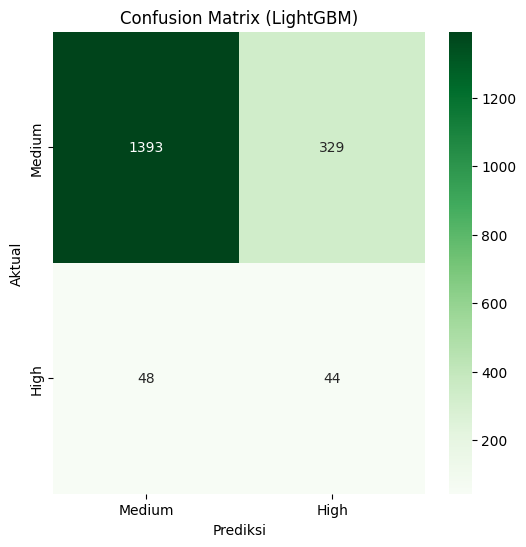

In [215]:
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Medium', 'High'], yticklabels=['Medium', 'High'])
plt.title('Confusion Matrix (LightGBM)')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

Feature Importance

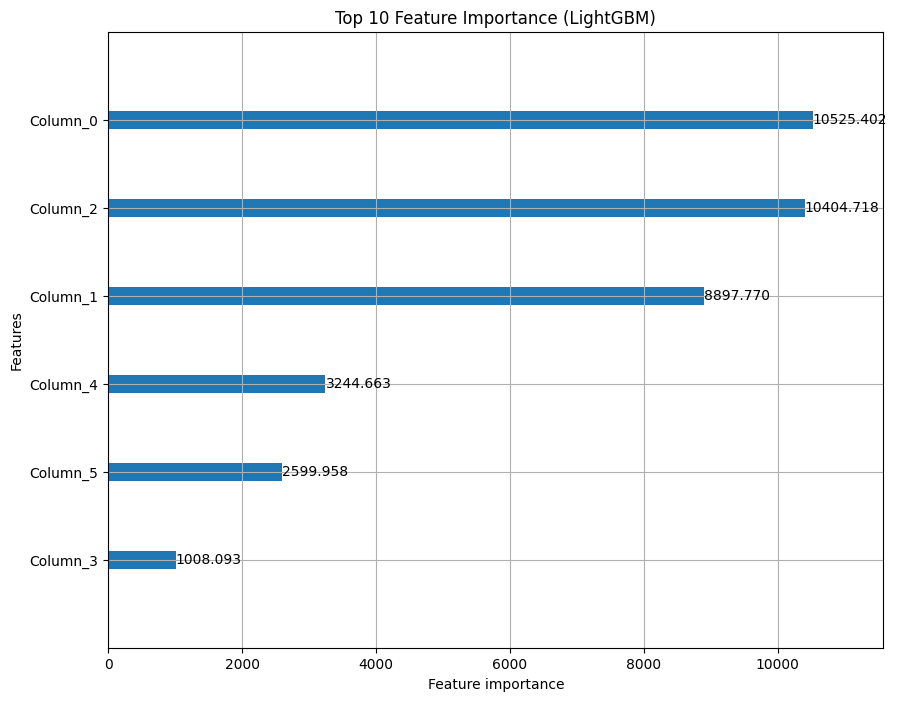

In [216]:
lgb.plot_importance(best_lgbm, figsize=(10, 8), max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importance (LightGBM)')
plt.show()